# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm



import warnings
plt.rcParams['figure.figsize']=[10,8]
sns.set(style='white')
sns.set_palette('Set2')



warnings.filterwarnings('ignore')
import platform
from matplotlib import font_manager, rc


path = "C:/Windows/Fonts/Malgun.ttf"


if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

Attrition  Age  DistanceFromHome  Gender  JobSatisfaction MaritalStatus  \
0          0   33               7.0    Male                3       Married   
1          0   35              18.0    Male                4        Single   
2          0   42               6.0    Male                1       Married   
3          0   46               2.0  Female                1       Married   
4          0   39               NaN    Male                4      Divorced   
5          1   22               4.0    Male                3        Single   
6          0   24              21.0    Male                1      Divorced   
7          0   34               8.0    Male                3       Married   
8          0   30              20.0    Male                1       Married   
9          0   26               6.0  Female                4       Married   

   MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
0          11691                 0.0       No                 11   
1           9362                 2.0       No                 11   
2          13348                 9.0       No                 13   
3          17048                 8.0       No                 23   
4           4127                 2.0       No                 18   
5           3894                 5.0       No                 16   
6           2296                 0.0       No                 14   
7           4404                 2.0       No                 12   
8           9957                 0.0       No                 15   
9           2659                 1.0      Yes                 13   

   RelationshipSatisfaction  TotalWorkingYears  WorkLifeBalance  
0                         4                 14                4  
1                         3                 10                3  
2                         2                 18                4  
3                         1                 28                3  
4                         4                  7                3  
5                         3                  4                3  
6                         2                  2                3  
7                         1                  6                4  
8                         3                  7                2  
9                         3                  3                3

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrtion

① 교차표(pd.crosstab())

In [4]:
pd.crosstab(data['Attrition'], data['Gender'])

Gender     Female  Male
Attrition              
0             421   629
1              69   131

② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
Gender                       
Female     0.859275  0.140725
Male       0.822558  0.177442


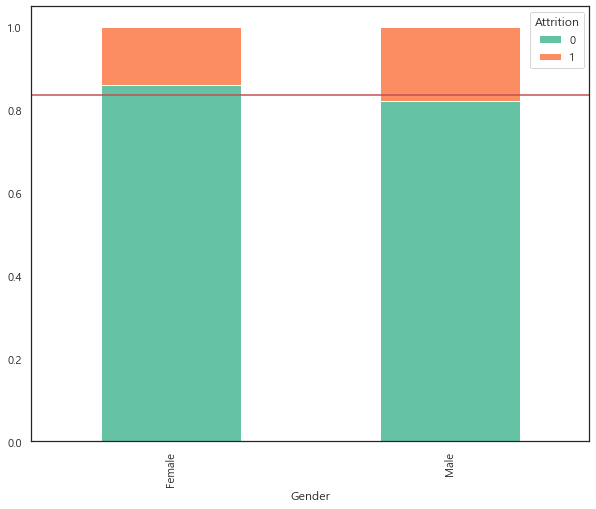

In [17]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

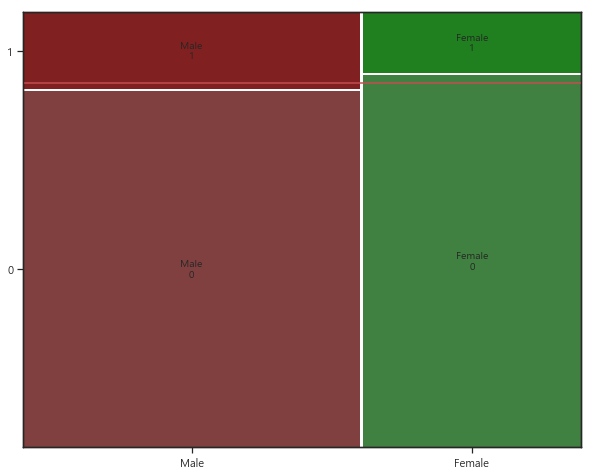

In [18]:
mosaic(data, [ 'Gender','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

In [21]:
table = pd.crosstab(data['Gender'], data['Attrition'])
print('교차표\n', table)
result = spst.chi2_contingency(table)
print('카이제곱통계량\t', result[0])
print('p-value\t', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
Gender             
Female     403   66
Male       598  129
카이제곱통계량	 2.5537631338119975
p-value	 0.1100318964829815
기대빈도
 [[392.5326087  76.4673913]
 [608.4673913 118.5326087]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* p-value가 0.05에 미치지 못하므로 관계가 없다고 볼수 있다.

#### 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 3) JobSatisfaction --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 4) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 5) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [5]:
s0 = data.loc[data['Attrition'] == 0, 'Age']
s1 = data.loc[data['Attrition'] == 1, 'Age']

① 그래프 : histogram, densityplot

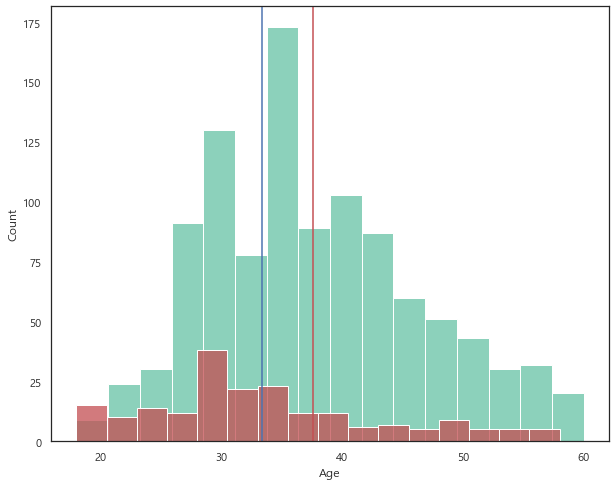

In [6]:
sns.histplot(s0, bins = 16)
sns.histplot(s1, color = 'r', bins = 16)
plt.axvline(s0.mean(), color = 'r')
plt.axvline(s1.mean(), color = 'b')
plt.show()

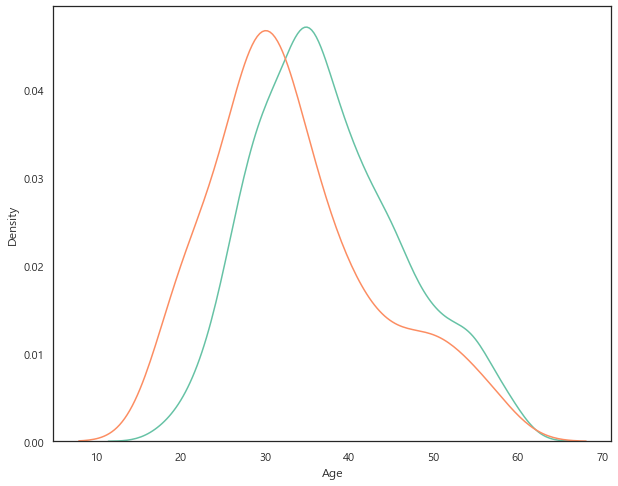

In [7]:
sns.distplot(s0, hist=False, kde=True)
sns.distplot(s1, hist=False, kde=True)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 30대 중반에 가장 많이 이직을 한다

② 수치화 : 로지스틱회귀

In [8]:
model = sm.Logit(data.Attrition, data.Age)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

0.004의 값을 도출해 내므로 제안적 증거로 볼수있다.

#### 2) DistanceFromHome --> Attrtion


In [9]:
s0 = data.loc[data['Attrition'] == 0, 'DistanceFromHome']
s1 = data.loc[data['Attrition'] == 1, 'DistanceFromHome']

① 그래프 : histogram, densityplot

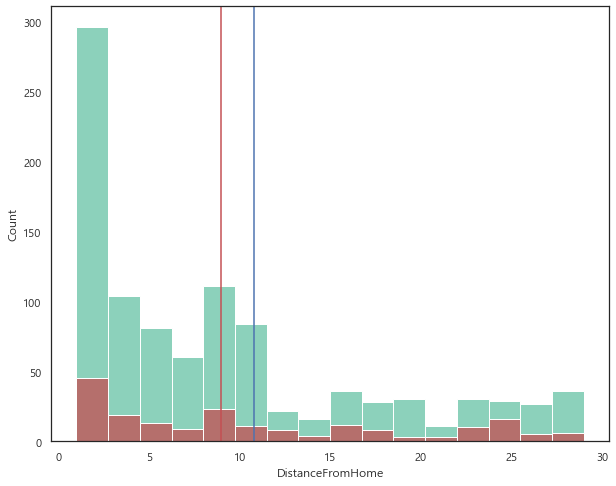

In [10]:
sns.histplot(s0, bins = 16)
sns.histplot(s1, color = 'r', bins = 16)
plt.axvline(s0.mean(), color = 'r')
plt.axvline(s1.mean(), color = 'b')
plt.show()

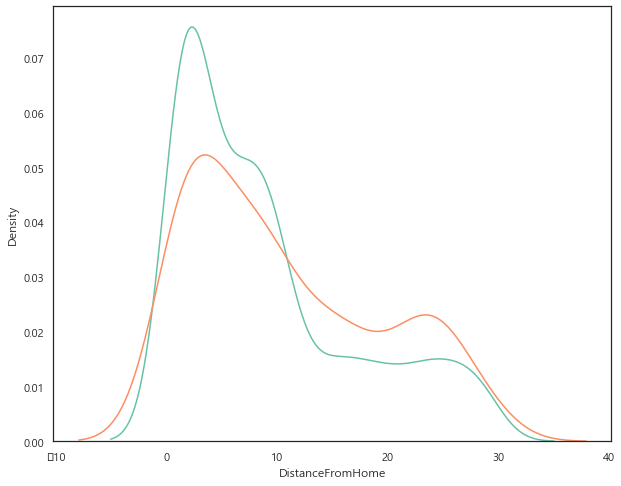

In [11]:
sns.distplot(s0, hist=False, kde=True)
sns.distplot(s1, hist=False, kde=True)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 거리가 많이 가까울수록 이직을 많이한다.

② 수치화 : 로지스틱회귀

In [12]:
data.dropna(subset=['DistanceFromHome', 'Attrition'], inplace=True)
model = sm.Logit(data.Attrition, data.DistanceFromHome)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 3) MonthlyIncome --> Attrtion


In [13]:
s0 = data.loc[data['Attrition'] == 0, 'MonthlyIncome']
s1 = data.loc[data['Attrition'] == 1, 'MonthlyIncome']

① 그래프 : histogram, densityplot

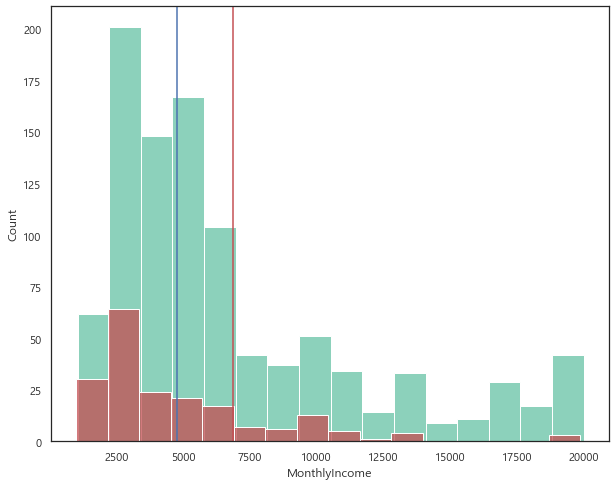

In [14]:
sns.histplot(s0, bins = 16)
sns.histplot(s1, color = 'r', bins = 16)
plt.axvline(s0.mean(), color = 'r')
plt.axvline(s1.mean(), color = 'b')
plt.show()

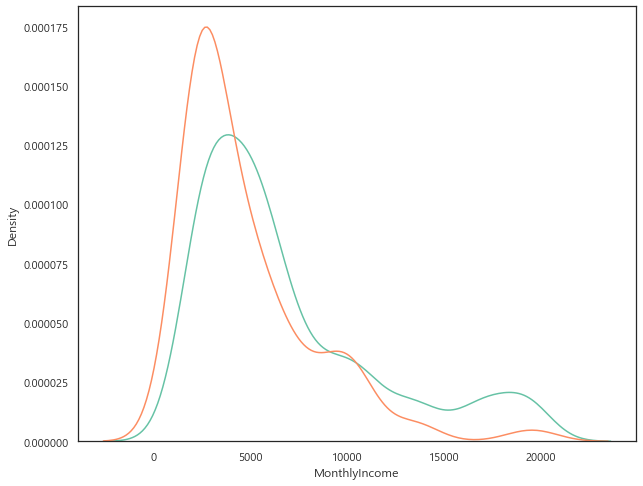

In [15]:
sns.distplot(s0, hist=False, kde=True)
sns.distplot(s1, hist=False, kde=True)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 월수입이 적은 사람이 대부분을 차지하고 있다.

② 수치화 : 로지스틱회귀

In [16]:
data.dropna(subset=['MonthlyIncome', 'Attrition'], inplace=True)
model = sm.Logit(data.Attrition, data.MonthlyIncome)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.443778
         Iterations 6
MonthlyIncome    7.889510e-68
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 4) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 5) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

## 4.관계 정리

### 1) 강한관계의 변수

### 2) 중간관계의 변수

### 3) (거의)관계 없음

## 5. 추가 분석

### 1) 분석1

### 2) 분석2

### 3) 분석3

### 4) 분석4